<a href="https://colab.research.google.com/github/Ishakasar/News-popularity-in-multiple-social-media-platforms/blob/main/Isha_Kasar_Team_4_Capstone_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the news popularity in multiple social media platforms. </u></b>

## <b> Problem Description </b>

### This is a large data set of news items and their respective social feedback on multiple platforms: Facebook, Google+ and LinkedIn.The collected data relates to a period of 8 months, between November 2015 and July 2016, accounting for about 100,000 news items on four different topics: Economy, Microsoft, Obama and Palestine.


## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### IDLink (numeric): Unique identifier of news items
* ### Title (string): Title of the news item according to the official media sources
* ### Headline (string): Headline of the news item according to the official media sources
* ### Source (string): Original news outlet that published the news item
* ### Topic (string): Query topic used to obtain the items in the official media sources
* ### PublishDate (timestamp): Date and time of the news items' publication
* ### SentimentTitle (numeric): Sentiment score of the text in the news items' title
* ### SentimentHeadline (numeric): Sentiment score of the text in the news items' headline
* ### Facebook (numeric): Final value of the news items' popularity according to the social media source Facebook
* ### GooglePlus (numeric): Final value of the news items' popularity according to the social media source Google+
* ### LinkedIn (numeric): Final value of the news items' popularity according to the social media source LinkedIn


### VARIABLES OF SOCIAL FEEDBACK DATA

* ### IDLink (numeric): Unique identifier of news items
* ### TS1 (numeric): Level of popularity in time slice 1 (0-20 minutes upon publication)
* ### TS2 (numeric): Level of popularity in time slice 2 (20-40 minutes upon publication)
* ### TS... (numeric): Level of popularity in time slice ...
* ### TS144 (numeric): Final level of popularity after 2 days upon publication

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
df= pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 2/Data & Resources/News_Final.csv')

In [46]:
df.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,99248.0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,0.000000,-0.053300,-1,-1,-1
1,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,-1,-1,-1
2,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,-1,-1,-1
3,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,0.000000,0.026064,-1,-1,-1
4,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,0.000000,0.141084,-1,-1,-1


In [47]:
df.describe()

,IDLink,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
count,93239.000000,93239.000000,93239.000000,93239.000000,93239.000000,93239.000000
mean,51560.653257,-0.005411,-0.027493,113.141336,3.888362,16.547957
std,30391.078704,0.136431,0.141964,620.173233,18.492648,154.459048
min,1.000000,-0.950694,-0.755433,-1.000000,-1.000000,-1.000000
25%,24301.500000,-0.079057,-0.114574,0.000000,0.000000,0.000000
50%,52275.000000,0.000000,-0.026064,5.000000,0.000000,0.000000
75%,76585.500000,0.064255,0.059709,33.000000,2.000000,4.000000
max,104802.000000,0.962354,0.964646,49211.000000,1267.000000,20341.000000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93239 entries, 0 to 93238
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IDLink             93239 non-null  float64
 1   Title              93239 non-null  object 
 2   Headline           93224 non-null  object 
 3   Source             92960 non-null  object 
 4   Topic              93239 non-null  object 
 5   PublishDate        93239 non-null  object 
 6   SentimentTitle     93239 non-null  float64
 7   SentimentHeadline  93239 non-null  float64
 8   Facebook           93239 non-null  int64  
 9   GooglePlus         93239 non-null  int64  
 10  LinkedIn           93239 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 7.8+ MB


In [49]:
df.isnull().sum()

IDLink                 0
Title                  0
Headline              15
Source               279
Topic                  0
PublishDate            0
SentimentTitle         0
SentimentHeadline      0
Facebook               0
GooglePlus             0
LinkedIn               0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


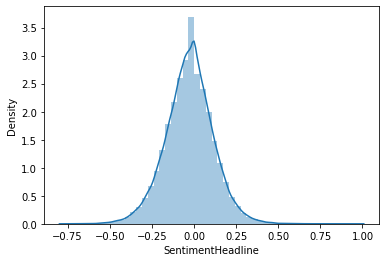

In [50]:
sns.distplot(df['SentimentHeadline'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


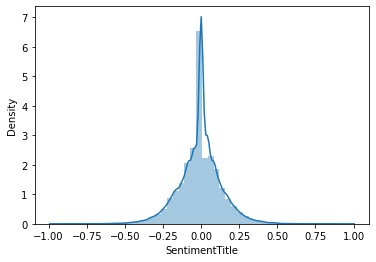

In [51]:
sns.distplot(df['SentimentTitle'])

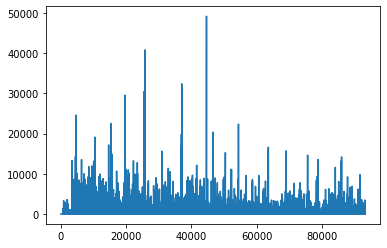

In [52]:
plt.plot(df['Facebook'])

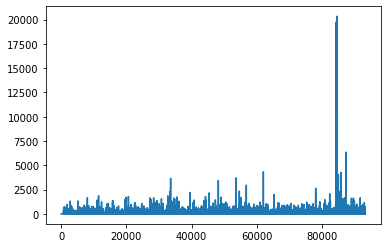

In [53]:
plt.plot(df['LinkedIn'])

In [54]:
df.dropna(inplace= True)

In [55]:
df.isna().sum()

IDLink               0
Title                0
Headline             0
Source               0
Topic                0
PublishDate          0
SentimentTitle       0
SentimentHeadline    0
Facebook             0
GooglePlus           0
LinkedIn             0
dtype: int64

In [56]:
df.drop(['IDLink','Source','PublishDate'], axis = 1, inplace= True)

In [57]:
df = pd.get_dummies(df, columns=['Topic'])

In [58]:
df[df['Facebook'] == -1 ] 

,Title,Headline,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,Topic_economy,Topic_microsoft,Topic_obama,Topic_palestine
0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,0.000000,-0.053300,-1,-1,-1,0,0,1,0
1,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",0.208333,-0.156386,-1,-1,-1,1,0,0,0
2,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",-0.425210,0.139754,-1,-1,-1,1,0,0,0
3,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,0.000000,0.026064,-1,-1,-1,1,0,0,0
4,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,0.000000,0.141084,-1,-1,-1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
93231,UK economy heading for marked slowdown after s...,"LONDON, (Reuters) – Britain's economy looks se...",0.000000,-0.196260,-1,0,0,1,0,0,0
93232,UK economy heading for marked slowdown after Q...,"LONDON, July 7 (Reuters) - Britain's economy l...",0.037689,-0.191747,-1,0,0,1,0,0,0
93234,Stocks rise as investors key in on US economy ...,The June employment report is viewed as a cruc...,0.104284,0.044943,-1,3,5,1,0,0,0
93235,Russian PM proposes to use conservative and to...,"In addition, establish stimulating economic po...",0.072194,0.000000,-1,0,1,1,0,0,0


In [59]:
df[df['LinkedIn'] == -1 ] 

,Title,Headline,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,Topic_economy,Topic_microsoft,Topic_obama,Topic_palestine
0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,0.000000,-0.053300,-1,-1,-1,0,0,1,0
1,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",0.208333,-0.156386,-1,-1,-1,1,0,0,0
2,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",-0.425210,0.139754,-1,-1,-1,1,0,0,0
3,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,0.000000,0.026064,-1,-1,-1,1,0,0,0
4,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,0.000000,0.141084,-1,-1,-1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
92107,WISeKey Joins Forces with Microsoft CityNext t...,"WISeKey International Holding Ltd , a leading ...",-0.125000,0.015450,-1,-1,-1,0,1,0,0
92148,"Monsanto, Microsoft to invest in agricultural ...",U.S. biotech company Monsanto Co and Microsoft...,0.000000,-0.074355,-1,-1,-1,0,1,0,0
92272,Cruz: Obama's 'willful blindness' is dangerous,crescent and star A Senate subcommittee recent...,0.000000,0.059963,-1,-1,-1,0,0,1,0
92325,Tinkering with South Africa's fiscal policy un...,South Africa's economy is not growing fast eno...,-0.056533,-0.249789,-1,-1,-1,1,0,0,0


In [60]:
df[df['GooglePlus'] == -1 ] 

,Title,Headline,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,Topic_economy,Topic_microsoft,Topic_obama,Topic_palestine
0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,0.000000,-0.053300,-1,-1,-1,0,0,1,0
1,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",0.208333,-0.156386,-1,-1,-1,1,0,0,0
2,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",-0.425210,0.139754,-1,-1,-1,1,0,0,0
3,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,0.000000,0.026064,-1,-1,-1,1,0,0,0
4,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,0.000000,0.141084,-1,-1,-1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
92107,WISeKey Joins Forces with Microsoft CityNext t...,"WISeKey International Holding Ltd , a leading ...",-0.125000,0.015450,-1,-1,-1,0,1,0,0
92148,"Monsanto, Microsoft to invest in agricultural ...",U.S. biotech company Monsanto Co and Microsoft...,0.000000,-0.074355,-1,-1,-1,0,1,0,0
92272,Cruz: Obama's 'willful blindness' is dangerous,crescent and star A Senate subcommittee recent...,0.000000,0.059963,-1,-1,-1,0,0,1,0
92325,Tinkering with South Africa's fiscal policy un...,South Africa's economy is not growing fast eno...,-0.056533,-0.249789,-1,-1,-1,1,0,0,0


In [61]:
df.head()

,Title,Headline,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,Topic_economy,Topic_microsoft,Topic_obama,Topic_palestine
0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,0.000000,-0.053300,-1,-1,-1,0,0,1,0
1,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",0.208333,-0.156386,-1,-1,-1,1,0,0,0
2,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",-0.425210,0.139754,-1,-1,-1,1,0,0,0
3,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,0.000000,0.026064,-1,-1,-1,1,0,0,0
4,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,0.000000,0.141084,-1,-1,-1,1,0,0,0


In [62]:
df['Text']= df['Title'].str.cat(df['Headline'], sep =" ")



In [63]:
text_df = df[['Text','SentimentTitle','SentimentHeadline','Topic_microsoft','Topic_obama','Topic_economy','Topic_palestine','Facebook']]

In [64]:
text_df = text_df[text_df['Facebook'] != -1 ]

In [65]:
text_df.head()

,Text,SentimentTitle,SentimentHeadline,Topic_microsoft,Topic_obama,Topic_economy,Topic_palestine,Facebook
726,Microsoft offering £100 discount on original B...,0.000000,-0.132812,1,0,0,0,0
727,Economy to improve though no change in last 6 ...,-0.082022,0.205537,0,0,1,0,0
728,Economy to improve though no change in last 6 ...,-0.082022,0.186968,0,0,1,0,0
729,Microsoft scales back free online storage plan...,0.106303,-0.207333,1,0,0,0,0
730,IDC predicts the emergence of ‘DX economy’ KUC...,0.000000,0.003189,0,0,1,0,1


In [66]:
text_df = text_df[:25000]

In [67]:
import string
!pip install spacy
!python -m spacy download en_core_web_sm
import spacy 
nlp = spacy.load("en_core_web_sm") 


✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [68]:
punct = string.punctuation
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [69]:
#doc = text_df['Text'].apply(nlp)

In [70]:
#m= doc.copy()

In [71]:
#for word in m#:
 #   print(word.text)

In [123]:
from spacy.lang.en import English
import re
from spacy.lang.en.stop_words import STOP_WORDS
nlp = English()
def spacy_tokenizer(sentence):
    
     sent = []
     pos_tag=[ 'ADJ',	'ADP','ADV',	'AUX',	'CONJ',	'CCONJ',	'DET','INTJ','NOUN',	'NUM','PART',	'PRON',	'PROPN','PUNCT',	'SCONJ',	'SYM','VERB','SPACE']
     mytokens = nlp(sentence)
     #mytokens = [ word for word in mytokens if word not in STOP_WORDS and word not in string.punctuation]      
     for word in mytokens:
       if word.pos_ not in pos_tag:
          sent.append(word.pos_)
     for word in mytokens:
          sent.append(word.lemma_)
     
     #return " ".join(sent)
    
     return ' '.join(sent)
doc1= text_df['Text'].apply(spacy_tokenizer)

In [124]:
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [200]:

def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation ]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [201]:
doc1= doc1.apply(text_process)

In [202]:
doc1.head(25)

726    Microsoft offering £ 100 discount original Ban...
727    Economy improve though change last 6 months As...
728    Economy improve though change last 6 months As...
729    Microsoft scales back free online storage plan...
730    IDC predicts emergence ‘ DX economy ’ KUCHING ...
731    Economic Preview Whew US economy gone rails Se...
732    Microsoft ’s OneDrive debacle shows cloud comm...
734    ‘ Economy improve next 2 quarters ’ coming six...
735    COMES FEDSPEAK preview week big market moving ...
736    Get ready ton Fedspeak DJIA SPY SPX QQQ CNY US...
737    Pak economy firm level perspective Business Re...
738    Microsoft play big part Digital India Bhaskar ...
739    Services pull Scottish economy back growth Sco...
740    Microsoft risks ire Windows 10 update push Mic...
741    Dollar Goes Savior Scapegoat Zimbabwe Economy ...
742    Microsoft readies next major Windows 10 Fall U...
745    Centre moves aggressively de bottleneck Indian...
746    Investing families vital

In [231]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf=True, lowercase=True, strip_accents='ascii', stop_words=STOP_WORDS, min_df =100, max_df = 1.0)


In [232]:
X = vectorizer.fit_transform(doc1)

In [234]:
df1 = pd.DataFrame(X.todense() , columns=vectorizer.get_feature_names())

In [246]:
df1.head(25)

,access,according,accounts,act,action,actions,activity,added,address,adds,administration,africa,agency,ago,agreement,ahead,aimed,aims,air,al,amazon,america,american,americans,amid,amp,analysis,analysts,android,announced,announces,annual,anti,ap,app,apple,apps,area,asia,asian,...,wake,wall,want,wants,war,warned,warns,washington,watch,way,ways,weak,web,wednesday,week,weeks,welcome,west,white,win,windows,women,work,workers,working,world,worst,xbox,xl,year,years,yesterday,york,young,SentimentTitle,SentimentHeadline,Topic_microsoft,Topic_obama,Topic_economy,Topic_palestine
726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,-0.132812,1.0,0.0,0.0,0.0
727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,-0.082022,0.205537,0.0,0.0,1.0,0.0
728,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.370315,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,-0.082022,0.186968,0.0,0.0,1.0,0.0
729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.106303,-0.207333,1.0,0.0,0.0,0.0
730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.003189,0.0,0.0,1.0,0.0
731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.356311,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,-0.232544,0.048614,0.0,0.0,1.0,0.0
732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.295055,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,-0.166139,-0.259052,1.0,0.0,0.0,0.0
734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.114820,0.256116,0.0,0.0,1.0,0.0
735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.344735,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.

In [236]:
df1.drop(['10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '2008',
 '2014',
 '2015',
 '2016',
 '21',
 '22',
 '23',
 '25',
 '30',
 '365',
 '950'], axis = 1,inplace = True)

In [237]:
df1.shape

(25000, 824)

In [238]:
text_df.columns

Index(['Text', 'SentimentTitle', 'SentimentHeadline', 'Topic_microsoft',
       'Topic_obama', 'Topic_economy', 'Topic_palestine', 'Facebook'],
      dtype='object')

In [257]:
df1['SentimentTitle'] = text_df['SentimentTitle']
df1['SentimentHeadline'] = text_df['SentimentHeadline']
df1['Topic_microsoft'] = text_df['Topic_microsoft']
df1['Topic_obama'] = text_df['Topic_obama']
df1['Topic_economy'] = text_df['Topic_economy']
df1['Topic_palestine'] = text_df['Topic_palestine']
df1['Facebook'] = text_df['Facebook']

In [258]:
df1.dropna(inplace = True)

#Linear regression


In [259]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import xgboost
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
import warnings
from pylab import rcParams
%matplotlib inline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')

In [253]:
lr = LinearRegression()

In [254]:
scalar = MinMaxScaler()

In [262]:
X = df1.drop(['Facebook'],axis = 1)
y = df1['Facebook']

In [263]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [264]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [265]:
y_tr = lr.predict(X_train)
y_ts = lr.predict(X_test)

In [266]:
#Train set metrics
Ltr_MSE  = mean_squared_error((y_train), (y_tr))
print("MSE :" , Ltr_MSE)

Ltr_RMSE = np.sqrt(Ltr_MSE)

print("RMSE :" ,Ltr_RMSE)

Ltr_r2 = r2_score((y_train), (y_tr))
print("R2 :" ,Ltr_r2)
Ltr_ar2 = 1-(1-r2_score((y_train), (y_tr)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Adjusted R2 : ",Ltr_ar2)

MSE : 559144.6604285206
RMSE : 747.7597611723438
R2 : 0.10627775658252803
Adjusted R2 :  0.06376102235678704


In [267]:
#Test set metrics
Lte_MSE  = mean_squared_error((y_test), (y_ts))
print("MSE :" , Lte_MSE)

Lte_RMSE = np.sqrt(Lte_MSE)
print("RMSE :" ,Lte_RMSE)

Lte_r2 = r2_score((y_test), (y_ts))
print("R2 :" ,Lte_r2)
Lte_ar2 = 1-(1-r2_score((y_test), (y_ts)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",Lte_ar2)

MSE : 604226.9015625
RMSE : 777.3203339437996
R2 : 0.008819242691067708
Adjusted R2 :  -0.21120751006806948


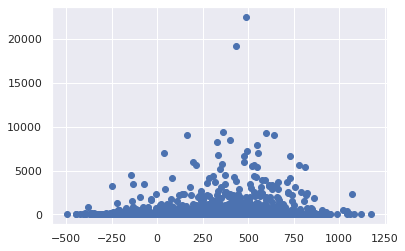

In [268]:
plt.scatter( y_ts, y_test, label = 'residuals')

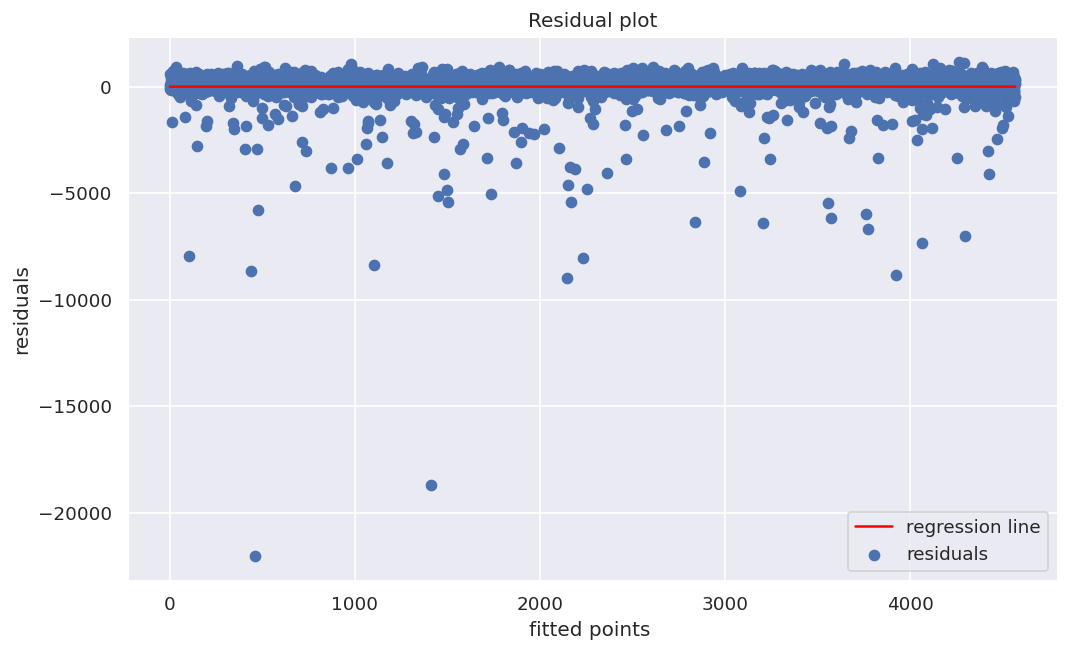

In [269]:
#Heteroskedasticity
residuals=y_ts-y_test

plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,len(y_test))
k = [0 for i in range(0,len(y_test))]
plt.scatter( f, residuals, label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.legend()

In [270]:
from sklearn.model_selection import GridSearchCV
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='r2', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [271]:
print(lasso_regressor.score(X_train, y_train))
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)
y_pred_lasso = lasso_regressor.predict(X_test)
y_pred_lasso_train = lasso_regressor.predict(X_train)

0.06374690498360913
The best fit alpha value is found out to be : {'alpha': 5}

Using  {'alpha': 5}  the negative mean squared error is:  0.06207371071008725


In [272]:
MSE  = mean_squared_error(y_train, y_pred_lasso_train)
print("Train MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("Train RMSE :" ,RMSE)

r2 = r2_score(y_train, y_pred_lasso_train)
print("Train R2 :" ,r2)
print("Train Adjusted R2 : ",1-(1-r2_score(y_train, y_pred_lasso_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

Train MSE : 585753.4852062037
Train RMSE : 765.3453372211812
Train R2 : 0.06374690498360913
Train Adjusted R2 :  0.019206865500396852


In [273]:
MSE  = mean_squared_error(y_test, y_pred_lasso)
print("Test MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("Test RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_lasso)
print("Test R2 :" ,r2)
print("Test Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Test MSE : 573074.2284360917
Test RMSE : 757.0166632486313
Test R2 : 0.05992244591121931
Test Adjusted R2 :  -0.14876018845457062


In [285]:
# Number of trees
n_estimators = [40,80,100]

# Maximum depth of trees
max_depth = [7,9,10]
min_samples_split = [40,50]
learning_rate=[0.1,0.5]

# HYperparameter Grid
param_xgb = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
             'min_samples_split':min_samples_split,
             'learning_rate':learning_rate
              }

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor()

# Grid search
xgb_grid = GridSearchCV(estimator=xgb_model,param_grid = param_xgb,cv = 3, verbose=2,scoring="neg_mean_squared_error",n_jobs = 2)

xgb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed: 16.5min


In [ ]:
xgb_grid.best_score_

In [ ]:
xgb_grid.best_params_

In [ ]:
xgb_optimal_model =xgb_grid.best_estimator_

In [ ]:
y_pred_xgb_test=xgb_optimal_model.predict(X_test)
y_pred_xgb_train=xgb_optimal_model.predict(X_train)

In [ ]:
MSE  = mean_squared_error(y_train, y_pred_xgb_train)
print("Train MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("Train RMSE :" ,RMSE)

r2 = r2_score(y_train, y_pred_xgb_train)
print("Train R2 :" ,r2)
print("Train Adjusted R2 : ",1-(1-r2_score((y_train), (y_pred_xgb_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

In [ ]:
MSE  = mean_squared_error(y_test, y_pred_xgb_test)
print("Test MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("Test RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_xgb_test)
print("Test R2 :" ,r2)
print("Test Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_xgb_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))